In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Tuple
from difflib import ndiff
from matplotlib import pyplot as plt

In [34]:
embedding_path = os.path.join(os.curdir, "embedding-bahdanau.csv")
embedding_raw = pd.read_csv(filepath_or_buffer=embedding_path)

onehot_path = os.path.join(os.curdir, "onehot-bahdanau.csv")
onehot_raw = pd.read_csv(filepath_or_buffer=onehot_path)

In [35]:
to_drop = [249064]

embedding_raw.drop(labels=to_drop, inplace=True)
onehot_raw.drop(labels=to_drop, inplace=True)

In [36]:
embedding = embedding_raw.copy(deep=True).groupby(by=["word_length", "char_length"], as_index=False).mean()
onehot = onehot_raw.copy(deep=True).groupby(by=["word_length", "char_length"], as_index=False).mean()

In [37]:
def get_correct_incorrect_ratios(results: pd.DataFrame) -> Tuple[float, float]:
    total = len(results)
    
    correct = results[results["correct"] == True]
    incorrect = results[results["correct"] == False]
    
    return len(correct) / total, len(incorrect) / total

In [38]:
for d in ndiff(a=embedding_raw.loc[20, "source"], b=embedding_raw.loc[20, "target"]):
    if d[0] == "":
        continue
    if d[0] == "-":
        print("subtract", d)
    if d[0] == "+":
        print("add", d)

subtract - ق
add + ف


In [39]:
embedding_raw.loc[50, "source"], embedding_raw.loc[50, "target"]

('الكثير أيضا', 'و المثير أيضا')

,char_length,matching ratio,correct,precision,recall,f1,word_length
0,4,0.522619,0.000000,0.267500,0.337500,0.298056,2.000000
1,5,0.748402,0.263736,0.615463,0.645055,0.628549,2.000000
2,6,0.853521,0.432056,0.769272,0.777971,0.772809,2.018583
3,7,0.900285,0.522510,0.832851,0.836735,0.834165,2.018788
4,8,0.919214,0.530010,0.847457,0.849024,0.847789,2.028235
...,...,...,...,...,...,...,...
94,98,0.997436,0.500000,0.994845,0.989796,0.992308,11.000000
95,102,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000
96,104,0.988038,0.500000,0.680952,0.682692,0.681818,11.000000
97,105,0.995238,0.500000,0.990476,0.990476,0.990476,11.000000


/tmp/ipykernel_66985/1191051700.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


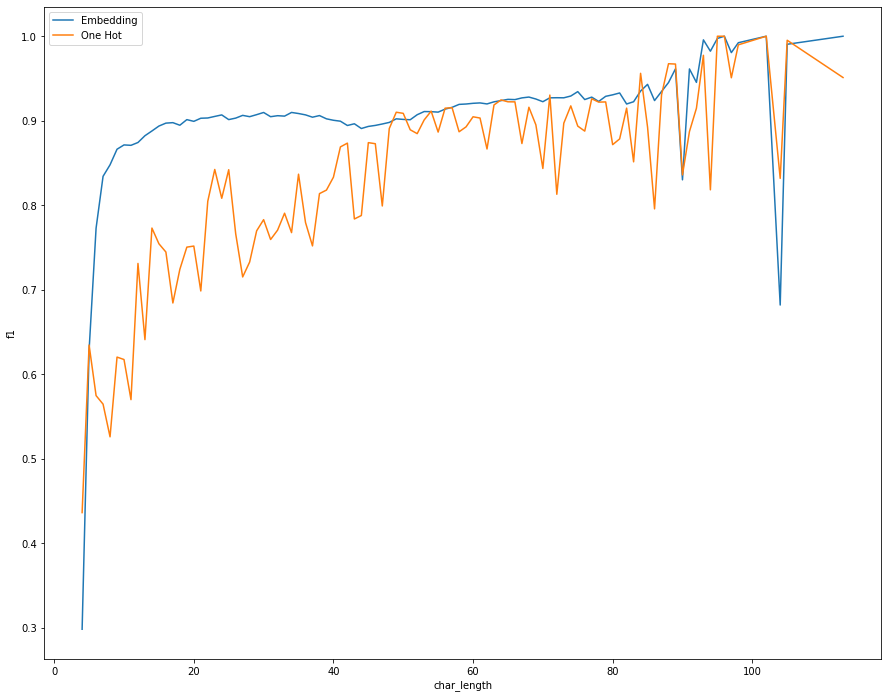

In [51]:
fig, ax = plt.subplots(figsize=(15, 12))

sns.lineplot(data=embedding_raw.groupby(by="char_length", as_index=False).mean(), x="char_length", y="f1", label="Embedding", ax=ax)
sns.lineplot(data=onehot.groupby(by="char_length", as_index=False).mean(), x="char_length", y="f1", label="One Hot", ax=ax)

fig.show()

In [41]:
embedding[(embedding["char_length"] > 100) & (embedding["f1"] < 0.5)].sort_values(by="f1", ascending=True)

,word_length,char_length,matching ratio,correct,precision,recall,f1


In [42]:
embedding

,word_length,char_length,matching ratio,correct,precision,recall,f1
0,2,4,0.522619,0.000000,0.267500,0.337500,0.298056
1,2,5,0.748402,0.263736,0.615463,0.645055,0.628549
2,2,6,0.859079,0.440237,0.775731,0.785010,0.779567
3,2,7,0.906846,0.532514,0.841259,0.846718,0.843473
4,2,8,0.924667,0.542379,0.857120,0.859844,0.858117
...,...,...,...,...,...,...,...
465,11,98,0.997436,0.500000,0.994845,0.989796,0.992308
466,11,102,1.000000,1.000000,1.000000,1.000000,1.000000
467,11,104,0.988038,0.500000,0.680952,0.682692,0.681818
468,11,105,0.995238,0.500000,0.990476,0.990476,0.990476


In [30]:
embedding_raw[embedding_raw["char_length"] == 103]

,source,result,target,matching ratio,correct,precision,recall,f1,char_length,word_length
249064,كالجيو استراتيجيا والمحور الإقليمية والمصالح ا...,كالجيو استراتيجيا والمحور الإقليمية والمصالح ا...,كالجيو استراتيجيا والمحاور الإقليمية والمصالح ...,0.995122,False,0.22549,0.223301,0.22439,103,11
